In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Heatmaps on contacts

In [2]:
cols = ["rna_chr", "rna_st", "rna_end", "dna_chr", "dna_start", "dna_end"]
dt_cols = {k: v for k,v in enumerate(cols)}

symdif = pd.read_csv("SUZ12_difftrack.bed", sep='\t', header=None).rename(columns=dt_cols)
inters = pd.read_csv("SUZ12_intersecttrack.bed", sep='\t', header=None).rename(columns=dt_cols)
frip   = pd.read_csv("SUZ12_fRIP.bed", sep='\t', header=None).rename(columns=dt_cols)
eCLIP  = pd.read_csv("SUZ12_eCLIP.bed", sep='\t', header=None).rename(columns=dt_cols)

FileNotFoundError: [Errno 2] No such file or directory: 'SUZ12_difftrack.bed'

In [ ]:
tmp = (eCLIP
       .loc[:, ["rna_chr", "dna_chr"]]
       .groupby(["rna_chr", "dna_chr"])
       .size()
       .reset_index(name="Occurence"))
tmp["Occurence"] = tmp["Occurence"] / tmp["Occurence"].sum(axis=0)
drw = tmp.pivot(index="rna_chr", columns="dna_chr", values="Occurence").fillna(0)


plt.figure(figsize=(24,20))
palette = "Pastel1"

ax = sns.heatmap(drw, cmap = "YlOrBr")

plt.yticks(rotation=0, fontsize=30)
plt.xticks(rotation=45, fontsize=30)
plt.xlabel("")
plt.ylabel("")

## Pie Charts on RNA types

In [8]:
cols = ["rna_chr", "rna_st", "rna_end", "dna_chr", "dna_start", "dna_end", "name", "type"]
dt_cols = {k: v for k,v in enumerate(cols)}

symdif = pd.read_csv("phases/SUZ12_symdiff.bed", sep='\t', header=None).rename(columns=dt_cols)
inters = pd.read_csv("phases/SUZ12_intersection.bed", sep='\t', header=None).rename(columns=dt_cols)
frip   = pd.read_csv("phases/SUZ12_fRIP_only.bed", sep='\t', header=None).rename(columns=dt_cols)
eCLIP  = pd.read_csv("phases/SUZ12_eCLIP_only.bed", sep='\t', header=None).rename(columns=dt_cols)

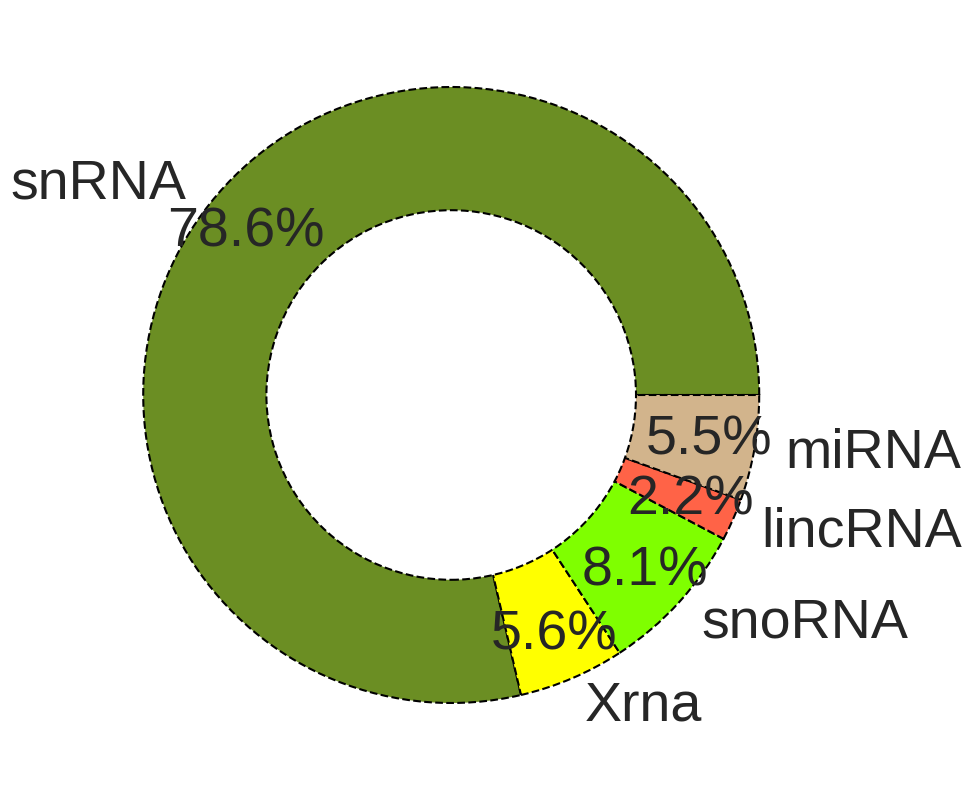

In [20]:
import matplotlib
matplotlib.rcParams['font.size'] = 20
plt.figure(figsize=(10,10))
plt.style.use("seaborn-v0_8-whitegrid")

df = symdif


x = df.type.value_counts().sort_values(ascending=False).loc[["snRNA", 
                                                             "Xrna", 
                                                             "snoRNA",
                                                             "lincRNA", 
                                                             "miRNA"
                                                            ]]

plt.pie(x, labels=x.index,
        autopct='%1.1f%%', pctdistance=0.85,
        colors=['olivedrab', 'yellow', 'chartreuse', 'tomato', "tan"],
        wedgeprops={"edgecolor":"k",'linewidth': 1.5, 'linestyle': 'dashed', 'antialiased': True},
       textprops={'fontsize': 40})


# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white', edgecolor="k", linewidth=1.5,
                           linestyle='dashed', antialiased=True)
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Displaying Chart
plt.show()

## Venn intersection on RNA genes

In [36]:
eCLIP = pd.read_csv("/home/daniil/Desktop/bioinformatics_group/TRIADS_2023/TRIADS/SUZ12.grid_mESC.bed.eCLIP.mESC.bed",
           sep='\t', header=None).iloc[:,7].values
fRIP = pd.read_csv("/home/daniil/Desktop/bioinformatics_group/TRIADS_2023/TRIADS/SUZ12.grid_mESC.bed.fRIP.mESC.bed",
           sep='\t', header=None).iloc[:,7].values

In [46]:
from matplotlib_venn._venn2 import venn2
import matplotlib

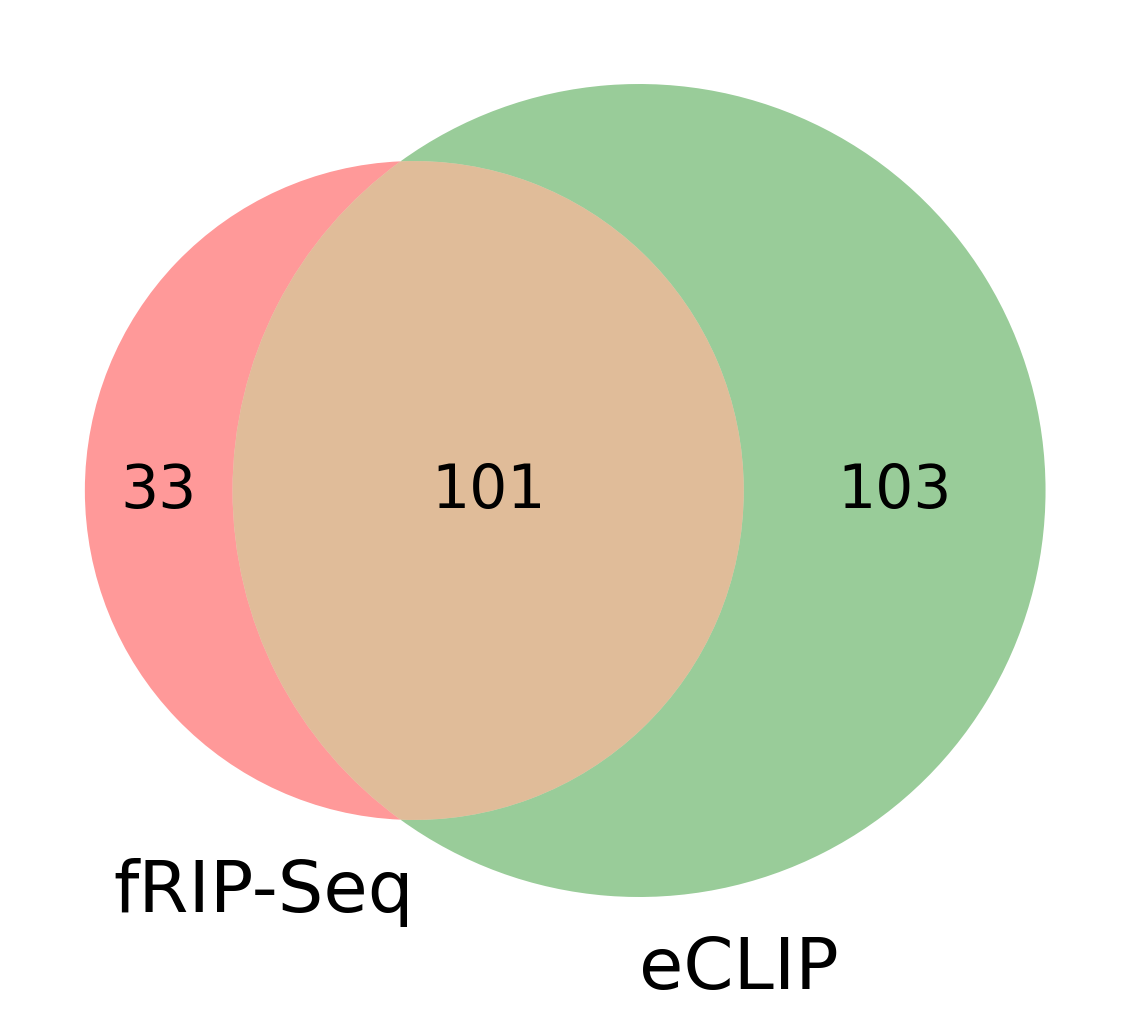

In [61]:
plt.figure(figsize=(20,20))
f = {'size'   : 60, 'weight':'normal'}
matplotlib.rc('font', **f)
venn2(subsets = (len(set(fRIP).difference(set(eCLIP))), len(set(fRIP).intersection(set(eCLIP))),
                 len(set(eCLIP).difference(set(fRIP)))),
      set_labels = ("fRIP-Seq", "eCLIP"))

## ChP plot in intersections

In [96]:
cols = ["rna_chr", "rna_st", "rna_end", "dna_chr", "dna_start", "dna_end", "name", "type"]
dt_cols = {k: v for k,v in enumerate(cols)}

symdif = pd.read_csv("SUZ12_symdiff.bed", sep='\t', header=None).rename(columns=dt_cols).loc[:, "name"]
inters = pd.read_csv("SUZ12_intersect.bed", sep='\t', header=None).rename(columns=dt_cols)
frip   = pd.read_csv("SUZ12_fRIP.bed", sep='\t', header=None).rename(columns=dt_cols)
eCLIP  = pd.read_csv("SUZ12_eCLIP.bed", sep='\t', header=None).rename(columns=dt_cols)

In [71]:
chp_table = pd.read_csv("/home/daniil/Desktop/bioinformatics_group/associativity/featureCounts/ES_grid_rnaseqMENCODE.chP.tab",
                       sep='\t').loc[:, ["gene_name_un", "zscore"]]

In [97]:
symdif = chp_table.merge(symdif, left_on="gene_name_un", right_on="name").zscore
inters = chp_table.merge(inters, left_on="gene_name_un", right_on="name").zscore
frip   = chp_table.merge(frip, left_on="gene_name_un", right_on="name").zscore
eCLIP  = chp_table.merge(eCLIP, left_on="gene_name_un", right_on="name").zscore

In [100]:
res_df =pd.DataFrame(list(zip(["SymDiff"] * symdif.shape[0], symdif)) + list(zip(["Intersect"] * inters.shape[0], inters)) + \
                     list(zip(["fRIP-Seq"] * frip.shape[0], frip)) + \
                     list(zip(["eCLIP"] * eCLIP.shape[0], eCLIP))).rename(columns={0:"Set", 1:"Z-score"})

<AxesSubplot:xlabel='Set', ylabel='Z-score'>

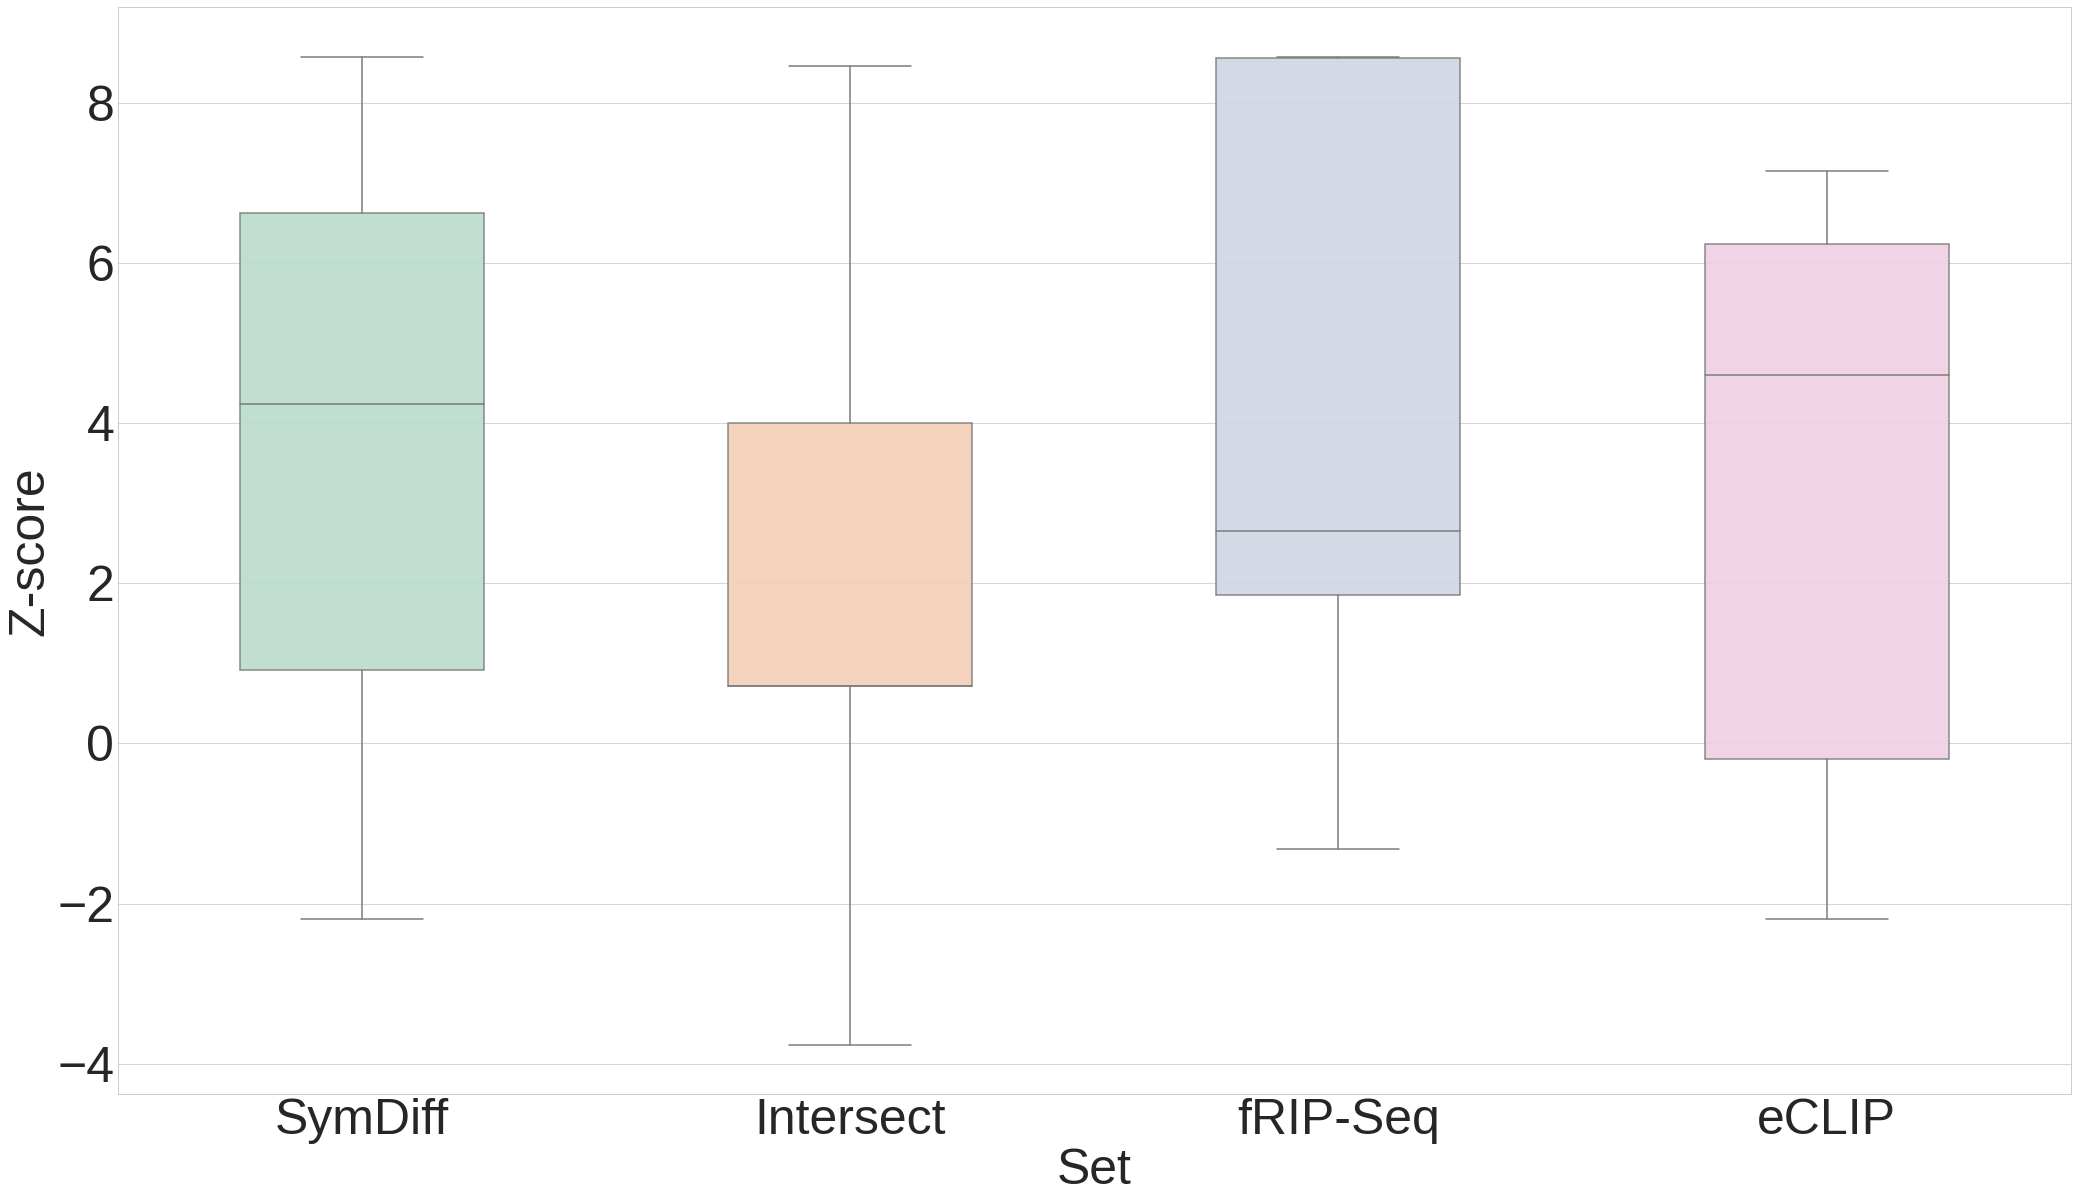

In [120]:
plt.figure(figsize=(35,20))
plt.style.use("seaborn-whitegrid")
palette = "Pastel2"
f = {'size'   : 50, 'weight':'normal'}
matplotlib.rc('font', **f)
sns.boxplot(data = res_df, x="Set", y="Z-score",boxprops=dict(alpha=.9), width=0.5, palette=palette)